In [1]:
# Imports
import pandas as pd
import numpy as np
# graphing and visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 6
sns.set_style('white')
# data manipulation
from sklearn.preprocessing import LabelEncoder

# Data Extraction and Exploration

## Reading CSV

In [2]:
data = pd.read_csv("data/athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Basic Information

Column Meanings:

    Name: Name of Athlete
    Sex: Sex
    Age: Age of athlete 
    Height: Height of athlete
    Weight: Weight of athlete
    Team: Country that athlete plays for
    NOC: Olympic Committee in charge of the athlete
    Games: Type of olympic (Winter/SUmmer)
    Year: Year of the olympic
    Season: Winter/Summer
    City: Where athlete is from
    Sport: Sport athlete is in
    Event: Event for the sport
    Medal: Medal that athlete won

### Describe dataset

In [3]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
data.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
data.median()

ID        68205.0
Age          24.0
Height      175.0
Weight       70.0
Year       1988.0
dtype: float64

### Total number of rows

In [7]:
# Total rows
print("There are a total of %s rows in this dataset." % len(data))

There are a total of 271116 rows in this dataset.


### Number of unique values in each column


In [8]:
data.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

### Check number of null values

In [9]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

From above, we can see that Age, Height, Weight and Medals contain a significant number of missing values

### Check number of data for each respective season of olympic

In [10]:
print("Total number of rows for Summer Olympics is %s." % len(data[data["Season"] == "Summer"]))
print("Total number of rows for Winter Olympics is %s." % len(data[data["Season"] == "Winter"]))

Total number of rows for Summer Olympics is 222552.
Total number of rows for Winter Olympics is 48564.


In [11]:
# Maybe separate into 2 different models

### Filling NA values

#### Filling Medal NA values

In [12]:
data["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

nan probably means that the atheletes that participated didn't win

In [13]:
# Fill NA with DNW
data["Medal"].fillna("DNW", inplace=True)

In [14]:
# check that fill was successfull
data["Medal"].unique()

array(['DNW', 'Gold', 'Bronze', 'Silver'], dtype=object)

#### Age, Weight, Height

In [15]:
# Fill with median for now

In [16]:
# Fill age with median age
data.Age.fillna(data.Age.median(),inplace=True)

In [17]:
# Fill age with median weight
data.Weight.fillna(data.Weight.median(),inplace=True)

In [18]:
# Fill age with median height
data.Height.fillna(data.Height.median(), inplace=True)

In [19]:
data.median()

ID        68205.0
Age          24.0
Height      175.0
Weight       70.0
Year       1988.0
dtype: float64

In [20]:
# Check if filled
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

## Exploratory Data Analysis

### Learning more about Gold Medalists

#### Age distribution 

In [21]:
goldMedals = data[(data.Medal=="Gold")]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


Text(0.5, 1.0, 'Distribution of Gold Medals by Age')

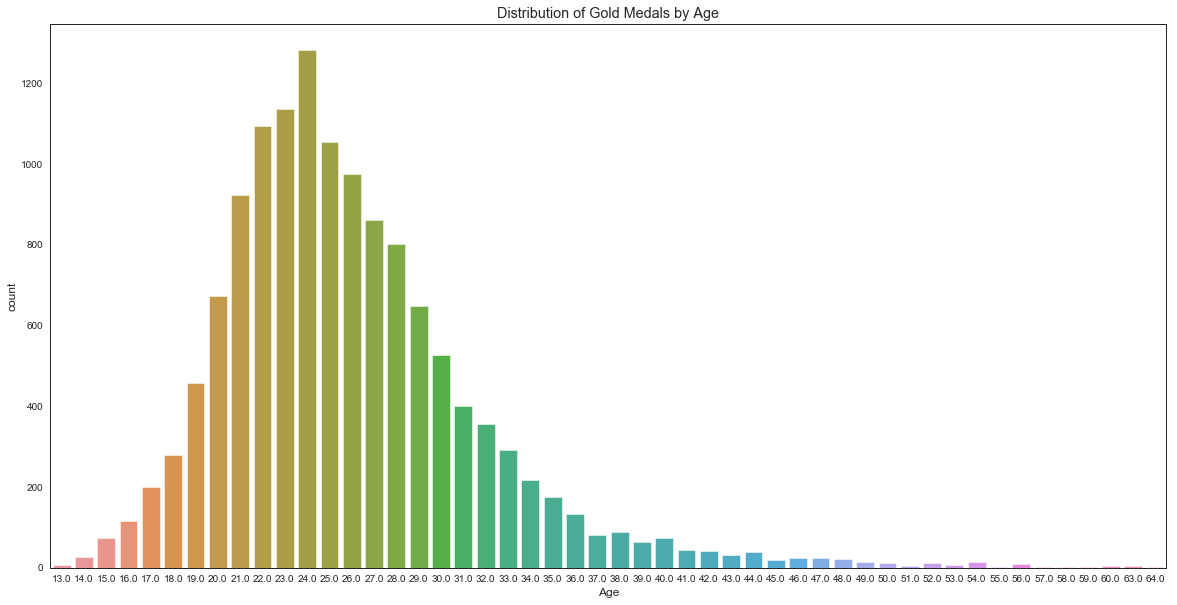

In [22]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(goldMedals["Age"])
plt.title("Distribution of Gold Medals by Age")

THERE ARE PEOPLE WINNING GOLD OVER AGE 50

In [23]:
goldMedals["ID"][goldMedals["Age"] > 50].count()

65

#### Check what sports these people participated in


In [24]:
goldSport50 = goldMedals["Sport"][goldMedals["Age"] > 50]

Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

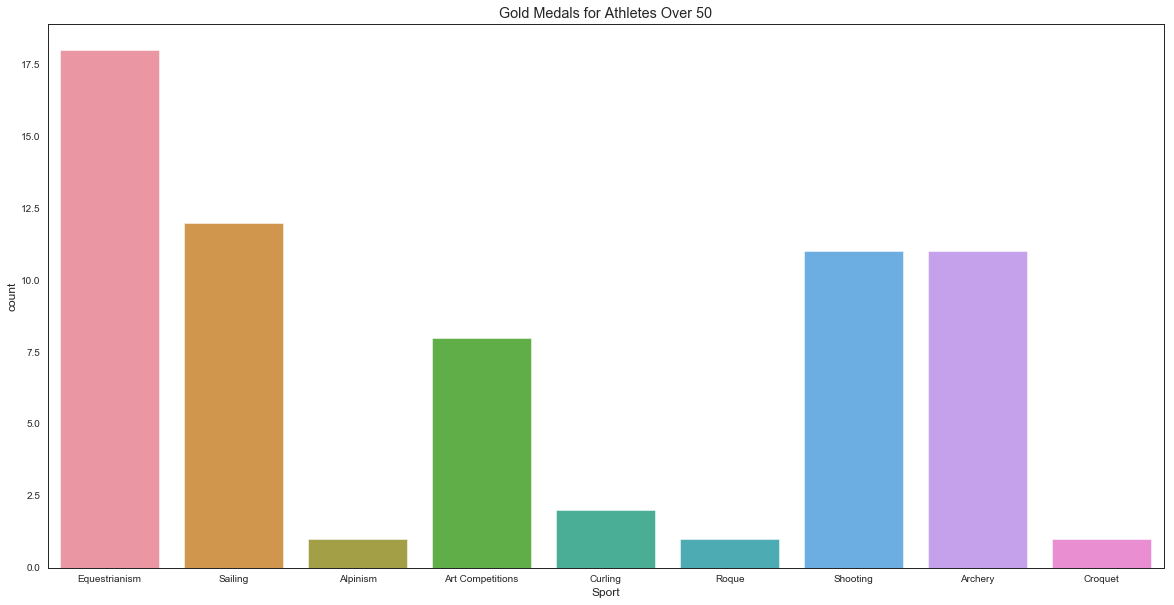

In [25]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldSport50)
plt.title('Gold Medals for Athletes Over 50')

TIL Art competitions counts a sport

### Top 5 countries

In [26]:
T5Country = goldMedals.Team.value_counts().reset_index(name="Medal").head(5)
print(T5Country)

           index  Medal
0  United States   2474
1   Soviet Union   1058
2        Germany    679
3          Italy    535
4  Great Britain    519


Text(0.5, 1.0, 'Medals per country')

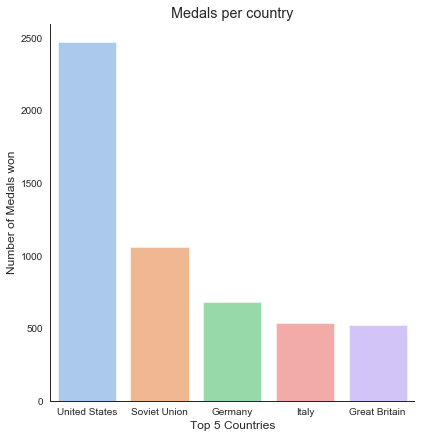

In [27]:
ax1 = sns.catplot(x="index", y="Medal", data = T5Country, height=6, kind="bar", palette="pastel")
ax1.set_xlabels("Top 5 Countries")
ax1.set_ylabels("Number of Medals won")
#ax1.despine(left=True)
plt.title("Medals per country")

#### USA - Which sports bring in the most MEDALS

In [28]:
USAGold = goldMedals.loc[goldMedals["NOC"]=="USA"]

In [29]:
USAGold.Event.value_counts().reset_index(name="Medal").head(20)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Rowing Men's Coxed Eights,108
3,Swimming Men's 4 x 100 metres Medley Relay,108
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


### Height Weight Distribution of Medalists

In [30]:
nonNullMedals = data[data.Medal != "DNW"]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

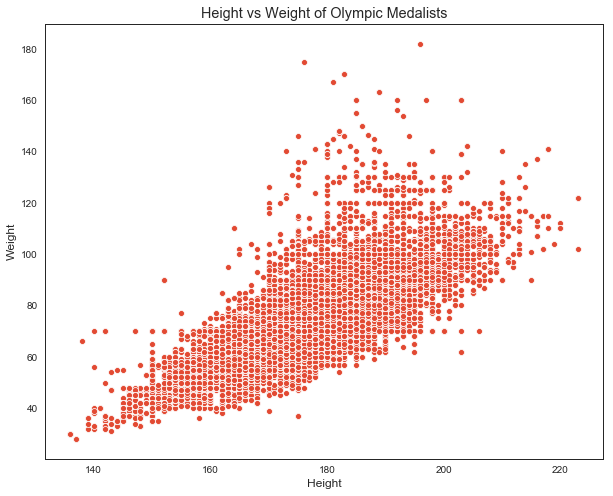

In [31]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x="Height", y="Weight", data=nonNullMedals)
plt.title("Height vs Weight of Olympic Medalists")

From the above scatter, we can tell that there is a linear relationship between height and weight.

More weight == More height

# Model Training

## Encoding Sport

In [32]:
le= LabelEncoder()

In [33]:
data["Sport"] = le.fit_transform(data["Sport"])
mapping = {l: i for i, l in enumerate(le.classes_)}

In [34]:
# extremely inefficient but it works
mapS = pd.Series(mapping).to_frame('Encoded_Value')
mapS["Sport"] = mapS.index
mapS.reset_index(level=0, inplace=True)
mapS = mapS.drop(columns=["index", "Encoded_Value"])
mapS

,Sport
0,Aeronautics
1,Alpine Skiing
2,Alpinism
3,Archery
4,Art Competitions
5,Athletics
6,Badminton
7,Baseball
8,Basketball
9,Basque Pelota


## Encoding Sex

In [35]:
data["Sex"] = le.fit_transform(data["Sex"])
mapping = {l: i for i, l in enumerate(le.classes_)}

In [36]:
# extremely inefficient but it works
mapSex = pd.Series(mapping).to_frame('Encoded_Value')
mapSex["Sex"] = mapSex.index
mapSex.reset_index(level=0, inplace=True)
mapSex = mapSex.drop(columns=["index", "Encoded_Value"])
mapSex

,Sex
0,F
1,M


## Dropping non-essential columns

These columns are being dropped since they won't be used in prediction for the chatbot

In [44]:
dropList = list(data.columns.values)
dropList.remove("Sex")
dropList.remove("Age")
dropList.remove("Height")
dropList.remove("Weight")
dropList.remove("Sport")
dropList

['ID',
 'Name',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Event',
 'Medal']

In [46]:
data.drop(dropList, axis=1, inplace=True)

KeyError: "['ID' 'Name' 'Team' 'NOC' 'Games' 'Year' 'Season' 'City' 'Event' 'Medal'] not found in axis"

In [48]:
data.sort_values("Sport").reset_index(drop=True)

,Sex,Age,Height,Weight,Sport
0,1,26.0,175.0,70.0,0
1,0,21.0,174.0,72.0,1
2,0,19.0,175.0,70.0,1
3,0,19.0,175.0,70.0,1
4,0,17.0,170.0,71.0,1
5,0,17.0,170.0,71.0,1
6,0,21.0,170.0,71.0,1
7,0,25.0,170.0,71.0,1
8,0,25.0,170.0,71.0,1
9,1,22.0,181.0,82.0,1


## Correlation Map

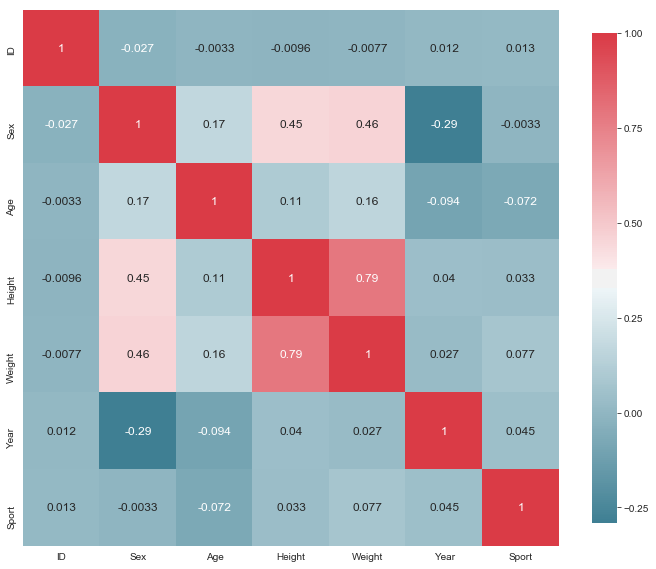

In [38]:
# Reusing from CA1
# Should change Sports to numerals to check correlation?
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(data)